# Step 1:
## Tuning Hyper Parameters

In [19]:
#get the features
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
fname = "D:/Users/ANUBHAV/Downloads/student-data.csv"
df = pd.read_csv(fname)
df = df.iloc[:,:]
sub_df = df.drop('passed', axis=1)

In [20]:
#vectorising the features and pushing them into a numpy array
dict_df = sub_df.T.to_dict().values()
vec = DictVectorizer()
nmpy_data = vec.fit_transform(dict_df).toarray()
sub_df=nmpy_data

In [21]:
#get the labels
L1 = df.passed
target = list(L1)

In [23]:
#Setting the range
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import _pickle as cPickle# RFC with fixed hyperparameters max_depth, max_features and min_samples_leaf
rfc = RandomForestClassifier(n_jobs=-1, oob_score = True, max_depth=10, max_features='sqrt', min_samples_leaf = 1) 
 
# Range of `n_estimators` values to explore.
n_estim = list(filter(lambda x: x % 2 == 0, list(range(1,100))))
 
cv_scores = []
 
for i in n_estim:
    rfc.set_params(n_estimators=i)
    kfold = sklearn.model_selection.KFold(n_splits=10, random_state=0)
    scores = sklearn.model_selection.cross_val_score(rfc, sub_df, L1, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    #cv_scores.append(scores.mean())

D:\Users\ANUBHAV\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Users\ANUBHAV\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Users\ANUBHAV\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Users\ANUBHAV\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not

D:\Users\ANUBHAV\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Users\ANUBHAV\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Users\ANUBHAV\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Users\ANUBHAV\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not

The optimal number of estimators is 38 with 66.6%


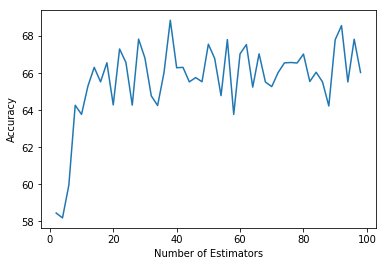

In [24]:
#visualising the best settings
import matplotlib.pyplot
optimal_n_estim = n_estim[cv_scores.index(max(cv_scores))]
print ("The optimal number of estimators is %d with %0.1f%%" % (optimal_n_estim, cv_scores[optimal_n_estim]))

matplotlib.pyplot.plot(n_estim, cv_scores)
matplotlib.pyplot.xlabel('Number of Estimators')
matplotlib.pyplot.ylabel('Accuracy')
matplotlib.pyplot.show()

# Step 2:
## Using the best settings obtained to train a model

In [9]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
import _pickle as cPickle
from sklearn.externals import joblib

clf = RandomForestClassifier(n_estimators=optimal_n_estim, max_depth=10, min_samples_leaf=1, n_jobs=-1)
clf = clf.fit(nmpy_data, target)

# Save the model to disk
model = 'train_model'
cPickle.dump(clf, open(model, 'wb'))

In [10]:
# Load the model from disk
loaded_model = cPickle.load(open('train_model', 'rb'))

# Step 3:
## Testing how well the model performs

In [11]:
# Supply a sample testing set:
fname = "D:/Users/ANUBHAV/Downloads/student-data.xlsx"
tdf = pd.read_excel(fname)
tdf = tdf.iloc[:,:]
testing_set = tdf.drop('passed', axis=1)
testing_set = testing_set.T.to_dict().values()

In [13]:
# Evaluate on the current model
test = vec.transform(testing_set).toarray()
print("\n")
print(loaded_model.predict_proba(test))
print(loaded_model.predict(test))



[[0.74611111 0.25388889]
 [0.49498558 0.50501442]
 [0.15267974 0.84732026]
 [0.0914031  0.9085969 ]
 [0.24005554 0.75994446]
 [0.11854759 0.88145241]
 [0.24315604 0.75684396]
 [0.82261905 0.17738095]
 [0.07652326 0.92347674]
 [0.07532157 0.92467843]
 [0.49215113 0.50784887]
 [0.18501658 0.81498342]
 [0.05857088 0.94142912]
 [0.14172678 0.85827322]
 [0.13243436 0.86756564]
 [0.17271796 0.82728204]
 [0.06520671 0.93479329]
 [0.24601385 0.75398615]
 [0.87112368 0.12887632]
 [0.12630308 0.87369692]
 [0.06047311 0.93952689]
 [0.04887683 0.95112317]
 [0.1175084  0.8824916 ]
 [0.12878922 0.87121078]
 [0.58659035 0.41340965]
 [0.75952381 0.24047619]
 [0.10382237 0.89617763]
 [0.06066229 0.93933771]
 [0.11740645 0.88259355]
 [0.19311594 0.80688406]
 [0.048779   0.951221  ]
 [0.05633049 0.94366951]
 [0.15655178 0.84344822]
 [0.2259828  0.7740172 ]
 [0.10155186 0.89844814]
 [0.5684802  0.4315198 ]
 [0.10765163 0.89234837]
 [0.20772669 0.79227331]
 [0.36855114 0.63144886]
 [0.19772578 0.80227422

['no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes'
 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes'
 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes'
 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes'
 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'no'
 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'yes'
 'no' 'yes' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'no'
 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 

In [14]:
print("\nAccuracy score =" + str(loaded_model.score(test, tdf.passed)))


Accuracy score =0.9670886075949368
